# *Monod* demonstration: fit to neural cell subtypes

We have run the *Monod* inference pipeline on four pre-clustered mouse brain cell datasets, disaggregated into GABAergic and glutamatergic cell types, as well as some glutamatergic subtypes. We would like to check whether the sampling parameters obtained for each dataset are consistent.

## Metadata and prerequisites

Define the dataset metadata and disk locations.

In [1]:
import time
t1 = time.time()

In [2]:
import sys
sys.path.insert(0, '/home/ggorin/projects/monod/src/')

In [3]:
import monod
from monod import analysis
import numpy as np
import matplotlib.pyplot as plt

Let us investigate the consistency of the sampling parameters.

In [4]:
dataset_meta = ['B08','C01','F08','H12']

subcluster_names = ['L2/3 IT','L5 IT','L6 IT','L5/6 NP', 'L6 CT', 'L6b']
subcluster_names = [x.replace(' ','').replace('/','') for x in subcluster_names]
cluster_names = ['Glutamatergic','GABAergic']
dataset_names = ['allen_'+dataset_meta[0]+'_'+y  for y in subcluster_names] \
              + ['allen_'+x+'_'+y for x in dataset_meta for y in cluster_names]  
raw_data_locations = [dataset_meta[0] for y in subcluster_names] + [x for x in dataset_meta for y in cluster_names]
transcriptome_filepath = '../polyA_ref/gg_200524_mouse_genome_polyA_cum_1'

n_datasets = len(dataset_names)


In [5]:
dir_string = './fits/gg_220913_024_allen_celltypes_2'
result_strings = [dir_string+'/'+x+'/Bursty_Poisson_20x21/grid_scan_results_upd.res' for x in dataset_names]

opt = []
n_cells = []
for i in range(n_datasets):
    sr = monod.analysis.load_search_results(result_strings[i])
    opt.append(sr.samp_optimum)
    n_cells.append(sr.n_cells)
opt = np.asarray(opt)
n_cells = np.asarray(n_cells)

In [6]:
xl = np.asarray([sr.sp.samp_lb[0],sr.sp.samp_ub[0]])
yl = np.asarray([sr.sp.samp_lb[1],sr.sp.samp_ub[1]])
x=np.linspace(xl[0],xl[1],sr.sp.gridsize[0])
y=np.linspace(yl[0],yl[1],sr.sp.gridsize[1])

In [7]:
dataset_names

['allen_B08_L23IT',
 'allen_B08_L5IT',
 'allen_B08_L6IT',
 'allen_B08_L56NP',
 'allen_B08_L6CT',
 'allen_B08_L6b',
 'allen_B08_Glutamatergic',
 'allen_B08_GABAergic',
 'allen_C01_Glutamatergic',
 'allen_C01_GABAergic',
 'allen_F08_Glutamatergic',
 'allen_F08_GABAergic',
 'allen_H12_Glutamatergic',
 'allen_H12_GABAergic']

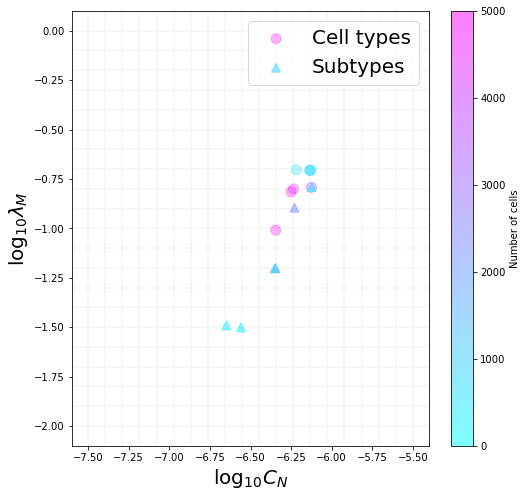

In [8]:
fs = 20

d=0.1

fig1,ax1 = plt.subplots(1,1,figsize=(8,8))
for i in range(sr.sp.gridsize[0]):
    plt.plot([x[i]]*2,yl + [-d,d],c='whitesmoke')
for i in range(sr.sp.gridsize[1]):
    plt.plot(xl+ [-d,d],[y[i]]*2,c='whitesmoke')
jit = np.random.randn(n_datasets,2)*0.01
opt_ = opt+jit
cmap = 'cool'

ctf = range(6,n_datasets)
plt.scatter(opt_[ctf,0],opt_[ctf,1],100,n_cells[ctf],zorder=1000,
            alpha=0.3,cmap=cmap,label='Cell types',vmin=0,vmax=5000)
stf = range(6)
plt.scatter(opt_[stf,0],opt_[stf,1],80,n_cells[stf],marker='^',zorder=1000,
            alpha=0.5,cmap=cmap,label='Subtypes',vmin=0,vmax=5000)
plt.xlim(xl+ [-d,d])
plt.ylim(yl+ [-d,d])

plt.legend(fontsize=fs,loc='upper right')
plt.colorbar(label='Number of cells')

plt.xlabel(r'$\log_{10} C_N$',fontsize=fs)
plt.ylabel(r'$\log_{10} \lambda_M$',fontsize=fs)

fig_string = sr.batch_analysis_string+'/landscape_qc.png'
plt.savefig(fig_string,dpi=450)

As might be expected, the subtypes with very low cell numbers appear to show stronger deviations.

In [9]:
t2 = time.time()
print('Runtime: {:.2f} seconds.'.format(t2-t1))

Runtime: 4.33 seconds.
